In [1]:
!pip install yahoofinance

In [17]:
import yahoofinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/My Drive')
from signals import signalProcess

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


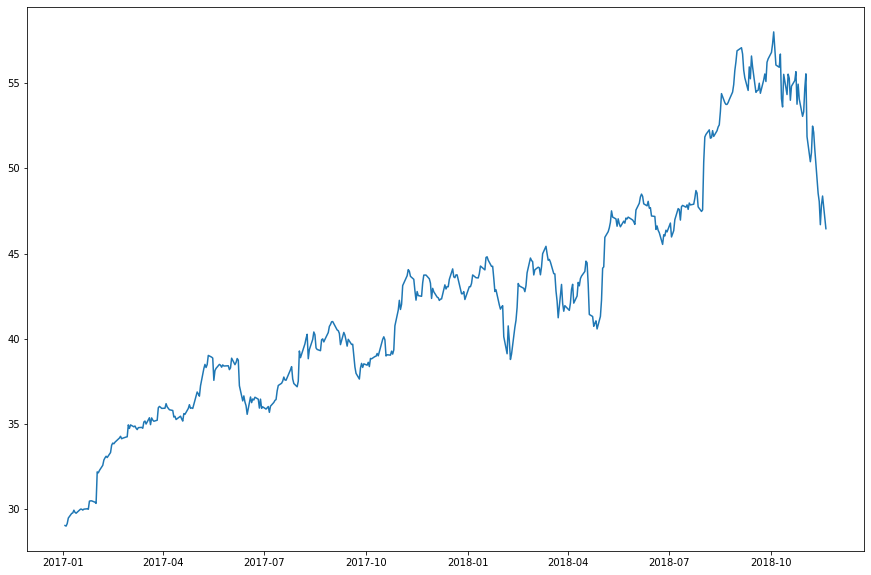

In [18]:
historical = yf.HistoricalPrices('AAPL', '2017-01-01', '2018-11-20')
dfs = historical.to_dfs()
df = dfs['Historical Prices']
df.index = pd.to_datetime(df.index)
fig1 = plt.figure(figsize=(15,10))
plt.plot(df[['Close']])

0.0020854676472817505

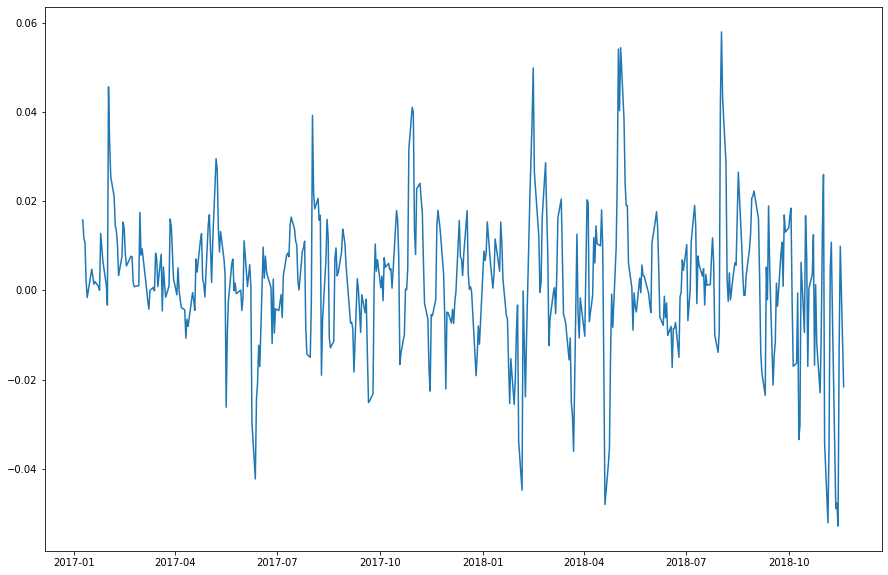

In [19]:
MEAN_WINDOW_DAYS = 5

stkSer = df['Close']

rm = stkSer.rolling(window=MEAN_WINDOW_DAYS)

stkSerNorm = (stkSer - rm.mean())
stkSerNorm = stkSerNorm / rm.mean()

plt.figure(figsize=(15,10))
plt.plot(stkSerNorm)
np.mean(stkSerNorm)


63
0.9635701087940974


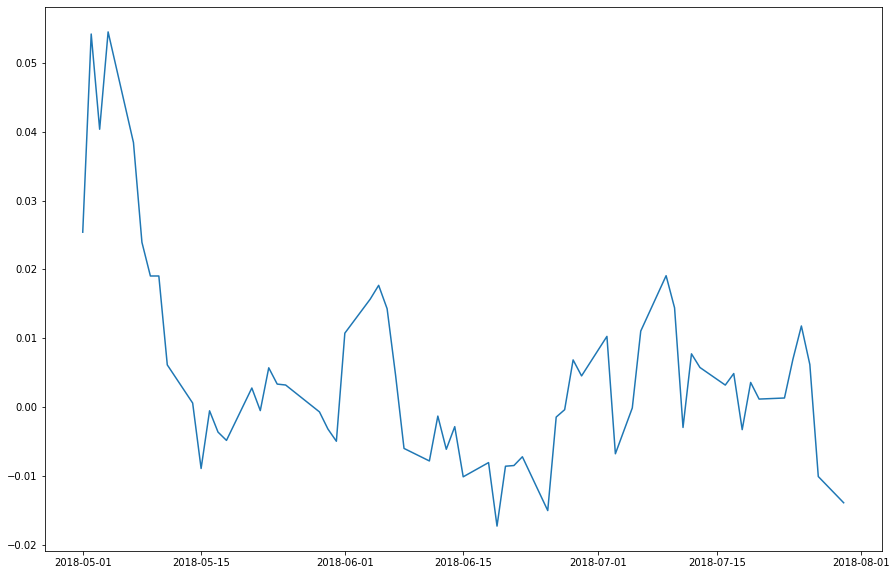

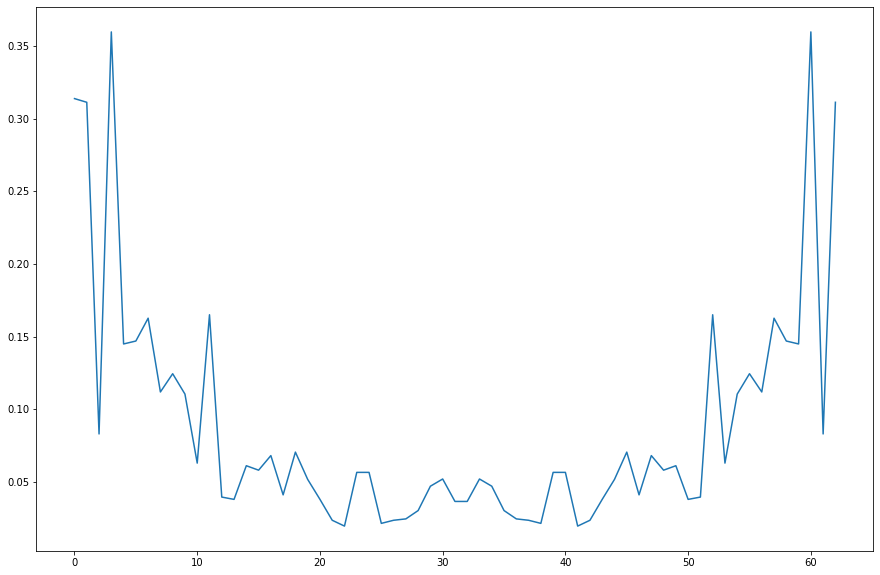

In [20]:
WINDOW_ANALYSIS_DAYS = 90;
#WINDOW_LOW_FREQ = np.round(2*np.pi/(WINDOW_ANALYSIS_DAYS/3));

stkSerNorm = stkSerNorm.dropna();

winStart = pd.to_datetime('2018-05-01')
tDel = pd.to_timedelta(WINDOW_ANALYSIS_DAYS, unit='days')
WinEnd = winStart + tDel

plt.figure(figsize=(15,10))
plt.plot((stkSerNorm[winStart:WinEnd]))

N=len(stkSerNorm[winStart:WinEnd])
print(N)

stkNormFFT = np.fft.fft(stkSerNorm[winStart:WinEnd])

E = abs(np.sqrt( sum(stkNormFFT*np.conj(stkNormFFT))))
print(E)

i = abs(stkNormFFT) > 0
stkNormFFTLowFreq = stkNormFFT[1:10]
 

plt.figure(figsize=(15,10))
plt.plot(abs(stkNormFFT))



63
(1.6006940289822498+2.3592239273284576e-16j)


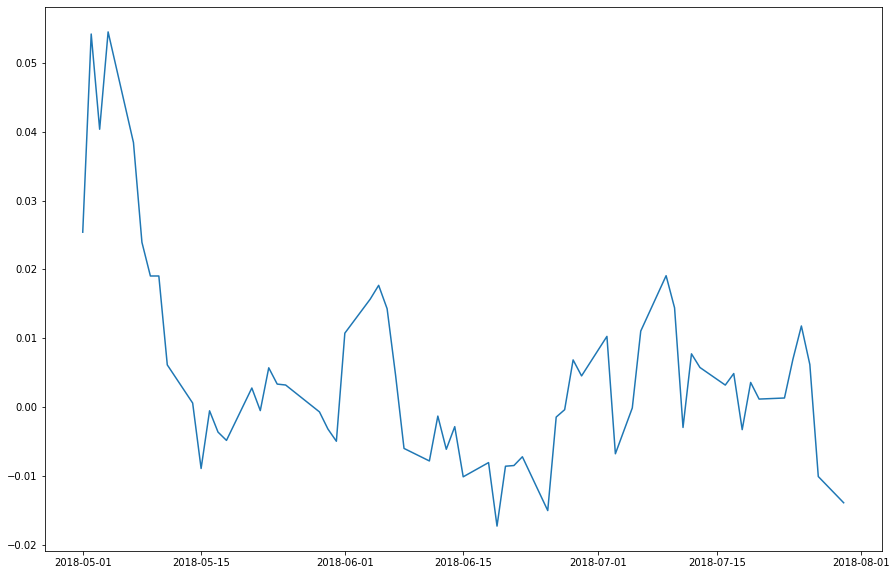

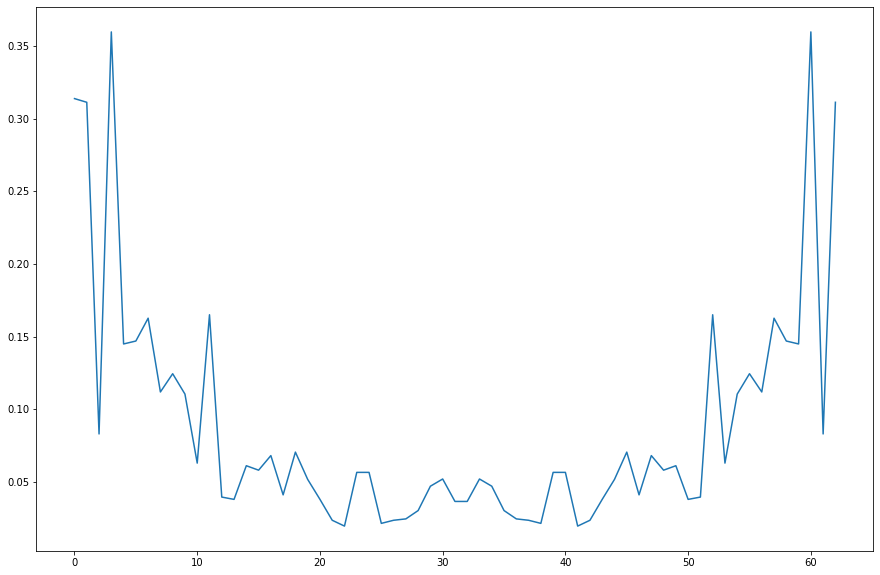

In [21]:
from scipy import signal

WINDOW_ANALYSIS_DAYS = 90;
#WINDOW_LOW_FREQ = np.round(2*np.pi/(WINDOW_ANALYSIS_DAYS/3));

stkSerNorm = stkSerNorm.dropna();

winStart = pd.to_datetime('2018-05-01')
tDel = pd.to_timedelta(WINDOW_ANALYSIS_DAYS, unit='days')
WinEnd = winStart + tDel

plt.figure(figsize=(15,10))
plt.plot((stkSerNorm[winStart:WinEnd]))

N=len(stkSerNorm[winStart:WinEnd])
print(N)

stkNormFFT = np.fft.fft(stkSerNorm[winStart:WinEnd])
# f, stkNormFFT = signal.periodogram(stkSerNorm[winStart:WinEnd])
E = stkNormFFT.sum()
# E = abs(np.sqrt( sum(stkNormFFT*np.conj(stkNormFFT))))
print(E)

i = abs(stkNormFFT) > 0
stkNormFFTLowFreq = stkNormFFT[1:10]
 

plt.figure(figsize=(15,10))
plt.plot(abs(stkNormFFT))



In [22]:
# filter periods by cycle duration and amplitude
MAX_PERIOD = WINDOW_ANALYSIS_DAYS / 3
MIN_PERIOD = WINDOW_ANALYSIS_DAYS / 10
MIN_RELATIVE_AMP = 0.16

ks = np.arange(0,N)
k_all = np.arange(0,N)

per = 2*np.pi*N/ks
perAmpNorm = max(abs(stkNormFFT))
perNorm = abs(stkNormFFT) / perAmpNorm


i =  (per > MIN_PERIOD) * (per < MAX_PERIOD) * (perNorm > MIN_RELATIVE_AMP)
k = np.arange(0,N)[i]
perFiltered = per[k]
print(k)
print(perFiltered)
print(perNorm[i])

[14 15 16 18]
[28.27433388 26.38937829 24.74004215 21.99114858]
[0.1699524  0.16142708 0.18933573 0.1960118 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [23]:
data = list(stkSerNorm[winStart:WinEnd].values)
data = np.asfarray(stkSerNorm[winStart:WinEnd]).tolist()
time = np.asfarray(stkSerNorm[winStart:WinEnd].index).tolist()
a = signalProcess({'data':{'my_stock':data}, 'time':{'my_stock':time}})
output = a.getPrimaryPeriods()


/content/drive/My Drive/signals.py:575: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  [slope1,inter] = np.linalg.lstsq(obsT,np.asfarray(range(a,c)))[0]
/content/drive/My Drive/signals.py:578: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  [slope2,inter] = np.linalg.lstsq(obsT,np.asfarray(range(c,b)))[0]


In [27]:
output


{'periods': {'my_stock': [23]},
 'powers': {'my_stock': [0.00010147651858001602]},
 'snr': {'my_stock': [9.62758057072026]}}

[28.27433388 26.38937829 24.74004215 21.99114858]


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


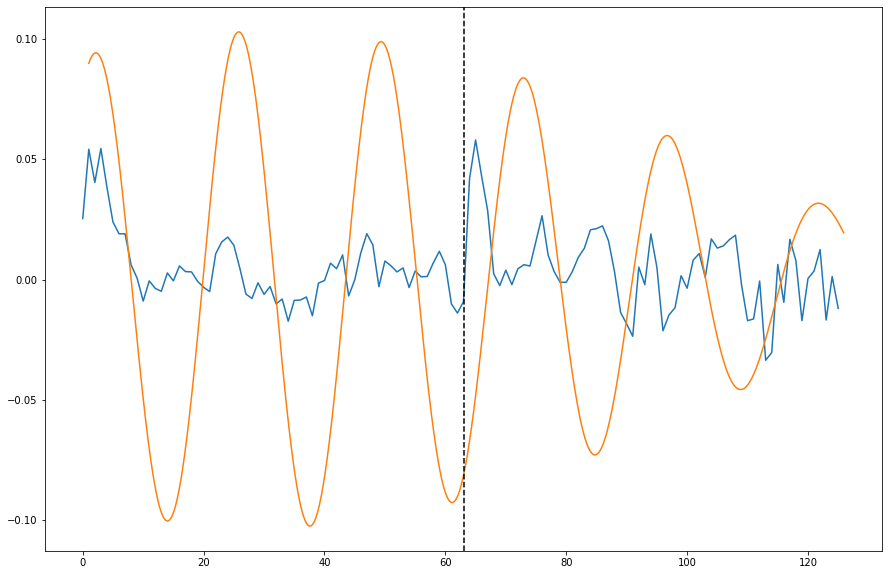

In [25]:
#stkNormDFFTLowFreq = np.fft.ifft(stkNormFFTLowFreq)
plt.figure(figsize=(15,10))
orgVals = stkSerNorm[winStart:(WinEnd + tDel)].values
t = np.arange(1, len(orgVals),0.1)


print(2*np.pi*1/(k/N))

A = abs(stkSerNorm.values[k])
Atot = abs(A.sum())
A = A / Atot

def CycFunc(t):
  res = np.array([])
  for ti in t:
    res = np.append(res,(A*np.real(stkNormFFT[k]*np.exp(1j*ti*k/N))).sum())
  return res

plt.plot(orgVals)
plt.plot(t, E*CycFunc(t) )
plt.axvline(x=N,color='k', linestyle='--')

# New Section

In [ ]:

pd.set_option('display.max_rows', None)

print(stkSerNorm[winStart:WinEnd])

Date
2018-05-01    0.025408
2018-05-02    0.054187
2018-05-03    0.040358
2018-05-04    0.054494
2018-05-07    0.038416
2018-05-08    0.023941
2018-05-09    0.019047
2018-05-10    0.019047
2018-05-11    0.006135
2018-05-14    0.000596
2018-05-15   -0.008909
2018-05-16   -0.000531
2018-05-17   -0.003623
2018-05-18   -0.004829
2018-05-21    0.002779
2018-05-22   -0.000502
2018-05-23    0.005713
2018-05-24    0.003349
2018-05-25    0.003213
2018-05-29   -0.000691
2018-05-30   -0.003179
2018-05-31   -0.004952
2018-06-01    0.010743
2018-06-04    0.015683
2018-06-05    0.017689
2018-06-06    0.014296
2018-06-07    0.004653
2018-06-08   -0.005994
2018-06-11   -0.007814
2018-06-12   -0.001298
2018-06-13   -0.006119
2018-06-14   -0.002833
2018-06-15   -0.010117
2018-06-18   -0.008052
2018-06-19   -0.017274
2018-06-20   -0.008580
2018-06-21   -0.008479
2018-06-22   -0.007205
2018-06-25   -0.015020
2018-06-26   -0.001440
2018-06-27   -0.000369
2018-06-28    0.006861
2018-06-29    0.004537
2018-0

In [ ]:
print(stkNormFFT)

[ 0.3137135 +0.j          0.3060303 -0.05633651j  0.07648908-0.03214971j
  0.22132025-0.28341582j  0.02675217-0.14240506j  0.02334105-0.1450391j
 -0.06752127-0.14793761j -0.09813012-0.05369609j  0.05309749-0.11250901j
 -0.05597185-0.09515655j -0.04903982-0.03940394j  0.01931146-0.16385071j
  0.01210611-0.03764257j -0.02973002-0.0235872j  -0.01440908-0.05939077j
  0.03152627-0.04874086j  0.06768898-0.00732176j  0.03950738+0.01120966j
  0.02289743-0.06666161j  0.04915709-0.01606269j  0.02386471-0.02954036j
  0.00834281-0.02206367j  0.01523262-0.01229914j  0.00731642-0.05606229j
  0.00695156-0.05610544j  0.01201242-0.01776788j -0.00185107+0.02351133j
 -0.02352292-0.00696947j -0.00154931-0.03022505j  0.01586765-0.04426449j
 -0.05056398+0.01206532j -0.00303355-0.03641169j -0.00303355+0.03641169j
 -0.05056398-0.01206532j  0.01586765+0.04426449j -0.00154931+0.03022505j
 -0.02352292+0.00696947j -0.00185107-0.02351133j  0.01201242+0.01776788j
  0.00695156+0.05610544j  0.00731642+0.05606229j  0.

In [81]:

import time
import numpy as np
from copy import copy, deepcopy
from scipy.interpolate import interp1d
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import dateutil.parser as parser

class signalProcess:


	def __init__(self,data_input,options_in=None):

		self.debug = False

		# Initialize class variables
		self.small = 1.0e-10
		self.large = 1.0e+32
		self.neg = -1.0e+10

		# Initialize default options
		self.window = None
		self.value = None
		self.sample = 1

		"""
		If options=None, despikeSeries() will be performed with default window length (5 samples), registerTime() will be
		performed with 1:1 sampling (no downsampling), and replaceNullData() will
		return error.

		Else, if options is supplied on instantiation, a dictionary containing the following options is supported:
		key - window : odd integer required
		key - value : float value required
		key - sample : integer [1,N] indicating the amount of downsampling (N) desired after optimal re-sampling performed

		:arg data_input : input time-series raw data dictionary with high-level keys "data" and "time" (optional).
					"data" has identifier for each series that corresponds to same key names under key "time" containing
					timestamps for each corresponding series under key "data"
		"""

		# Validate processing options values if present
		if self.debug is True:
			print("Validating processing options\n")

		if options_in is not None:
			if 'window'in options_in:
				self.window = options_in['window']
			if 'value' in options_in:
				self.value = options_in['value']
			if 'sample' in options_in:
				self.sample = options_in['sample']

		self.data = deepcopy(data_input)

		# Validate timestamp if present, and convert to milliseconds since epoch if format is datetime string
		if "time" in self.data:
			if self.debug is True:
				print("Validating Timestamps and Converting to ms since epoch if required\n")

			for time_key in self.data["time"]:
				self.data["time"][time_key] = self.validateTime(data_input["time"][time_key])

	def replaceNullData(self):

		"""
		N-dim data series replacement of single self.value float data from series by linear interpolation.

		:var self.data : dictionary with key "data" - dictionary with key : time-series raw data float lists
						and optionally key "time" (optional) with key : time-series timestamp lists
		:return datanew : dictionary with key "data - dictionary with key time-series after replacement of self.value
		"""

		try:

			dataN = deepcopy(self.data)

			# Handle case with and without high-level key "time"
			if "time" in self.data:
				datanew = {'data':{},'time':self.data["time"]}
			else:
				datanew = {'data':{}}

			# Index any samples == self.value for each time-series in input dictionary
			for m,keys in enumerate(dataN['data']):
				samples = range(0,len(dataN['data'][keys]))
				times = np.asfarray(dataN['time'][keys])
				tmp_array = np.zeros(shape=(len(samples)),dtype=float)
				if self.value == 'NaN':
					inx_null = [g for g in samples if np.isnan(dataN['data'][keys][g])]
					inx_ok = [g for g in samples if np.isnan(dataN['data'][keys][g])]
				else:
					inx_null = [g for g in samples if np.abs(dataN['data'][keys][g] - self.value) <= self.small]
					inx_ok = [g for g in samples if np.abs(dataN['data'][keys][g] - self.value) > 1]
				if len(inx_null) == 0:	# No replaced values in returned series
					tmp_array[:] = dataN['data'][keys]

				elif len(inx_ok) == 1:	# Only 1 good value in input series
					tmp_array[:] = dataN['data'][keys][inx_ok[0]]

				elif len(inx_ok) == 0:	# No GOOD values in array so maintain all input data in returned series
					tmp_array[:] = self.value

				else:					# At least 2 good values in input series to interpolate

					# Handle case of first point to set lower bound for interpolation
					if inx_null[0] == 0:
						dataN['data'][keys][0] = dataN['data'][keys][inx_ok[0]]

					# Handle case of last point to set upper bound for interpolation
					if inx_null[-1] == len(dataN['data'][keys])-1:
						dataN['data'][keys][-1] = dataN['data'][keys][inx_ok[-1]]

					# Re-index replaced values with lower/upper bounds set from above
					if self.value == 'NaN':
						inx_mod = [g for g in samples if not np.isnan(dataN['data'][keys][g])]
					else:
						inx_mod = [g for g in samples if np.abs(dataN['data'][keys][g] - self.value) > 1]

					# Handle interior points with linear interpolant
					signal_intrp = interp1d(times[inx_mod],np.asfarray(dataN['data'][keys])[inx_mod])
					tmp_array = signal_intrp(times)

				datanew['data'][keys] = tmp_array.tolist()

			# Compute average sampling rate for all times
			#device_delta_t = float(np.mean(np.asfarray(datanew['time'][1:]) - np.asfarray(datanew['time'][0:-1])))

			return datanew

		except Exception as e:
			raise Exception (e)


	def despikeSeries(self):

		"""
		Data series despiking using Savitsky-Golay filtering, Otsu's method for thresholding, and
		interpolation for spike data replacement

		:var self.data : dictionary : multiple time-series lists under key "data", with corresponding key names under
						key "time" with lists of monotonic timestamps sampling for each time-series in key "data"
		:var (optional) : self.window : integer : sample length of local despike window (must be odd integer)
		:return signal_out : dictionary with same keys "data" and "time" of same size as input dictionary but with
							processed data returned under dictionary "data"

		Exceptions Handled : If any time-series has zero variance (equal values), then input time-series list is returned
		"""

		# Handle case with and without high-level key "time"
		if "time" in self.data:
			signal_out = {'data':{},'time':self.data["time"]}
		else:
			signal_out = {'data':{}}

		# Define local odd-integer despike window or use default window length = 5
		if self.window is not None:
			# Check if odd integer, else translate to nearest odd integer < window_opt
			if self.window/2.0 == self.window/2:
				winlen = self.window - 1
			else:
				winlen = self.window
		else:
			winlen = 5	# must be an odd integer of order of expected spike sample width x (1.5 - 3)

		# Pad array by 1 sample to ensure that spike at last sample is handled properly
		padlen = 1

		# Despike all series in input dictionary
		for data_key in self.data["data"]:

			try:	# Exception handling for any single time-series containing same value for entire list

				# Copy of input signal for spike replacement
				sigint2 = np.asfarray(self.data["data"][data_key])

				# Pad the signal by mean of previous 20-sample signal above global time-series mean value to
				# avoid poor interpolation at the endpoint of array for streaming time-series
				sigint = np.ndarray(shape=(len(sigint2)+padlen),dtype=float)
				sigint[0:len(sigint2)] = sigint2

				#Add Datuming to check for both positive spikes AND negative spikes
				datum = np.abs(sigint2[-20:-1]) - np.max(np.abs(sigint2[-20:-1]))
				tq = np.mean(datum)
				datavg = np.mean(sigint2[-20:-1])

				paddarr = sigint2[-20:-1]

				padmask = (datum <= tq)
				if len(datum[padmask]) == 0:
					padval = datavg
				else:
					padval = np.mean(paddarr[padmask])

				sigint[len(sigint2):] = padval	# Ignore last point for padding mean computation

				# Interpolate the time-series with degree-2 polynomial
				signalnew = savgol_filter(sigint,winlen,2)

				# Compute (raw signal - interpolated signal) residuals for statistical Otsu's test
				diffsig = np.abs(sigint-signalnew)
				diffperc = diffsig*(1/(np.abs(np.mean(sigint))))

				# Determination of the most appropriate threshold for the spike detection using Otsuʼs method
				# Histogram binning of the signal residual and initialization of the threshold
				[counts1,edges]=np.histogram(diffsig,100)
				amp_range = [edges[m] for m in range(1,len(edges))]
				counts1 = counts1 * (1/float(len(diffsig)))

				# Calculation of the initial class probabilities and means
				proba_C1 = np.ndarray(shape=len(amp_range),dtype=float)
				proba_C2 = np.ndarray(shape=len(amp_range),dtype=float)
				mean_C1 = np.ndarray(shape=len(amp_range),dtype=float)
				mean_C2 = np.ndarray(shape=len(amp_range),dtype=float)
				C1C2_var = np.ndarray(shape=len(amp_range)-1,dtype=float)
				threshold = np.ndarray(shape=len(amp_range)-1,dtype=float)

				proba_C1[0] = counts1[0]

				if proba_C1[0] < self.small:
					proba_C2[0] = 0.0
					mean_C1[0] = 0.0
					mean_C2[0] = 0.0
				else:
					proba_C2[0] = 1 - proba_C1[0]
					mean_C1[0] = (amp_range[0]*counts1[0])/proba_C1[0]
					mean_C2[0] = np.sum(amp_range[1:len(amp_range)]*counts1[1:len(amp_range)])/proba_C2[0]

				# Test all possible threhold values and their effect on the between-class variance
				threshold[0] = amp_range[1]
				C1C2_var[0] = 0.0
				for i in range(1,len(amp_range)-1):
						threshold[i] = amp_range[i+1]
						proba_C1[i] = np.sum(counts1[0:i])
						proba_C2[i] = 1-proba_C1[i]
						mean_C1[i] = np.sum(amp_range[0:i]*counts1[0:i])/proba_C1[i]
						mean_C2[i] = np.sum(amp_range[i+1:len(amp_range)]*counts1[i+1:len(amp_range)])/proba_C2[i]
						C1C2_var[i] = proba_C1[i]*proba_C2[i]*(mean_C1[i]-mean_C2[i])**2

				# The optimal threshold maximizes the between-class variance
				#indx = len(C1C2_var) + 1 - np.argmax(C1C2_var[:0:-1])
				indx = np.argmax(C1C2_var)

				#Handle 'small-amplitude' case where NO spike is greater than 5% of interpolated signal then ignore threshold
				if np.max(diffperc) < .05:

					signalout = sigint			# Return raw data

				else:		# Return despiked signal

					finalthresh = threshold[indx]

					# Mask and index array elements that are above threshold
					mask = diffsig > finalthresh
					x = [m for m in range(0,len(mask)) if mask[m] == True]

					# Set up indexing arrays for defining spikes in time-series
					startspike = x[0]
					spikes = np.ndarray(shape=len(x),dtype=int)
					jmin = np.ndarray(shape=len(x),dtype=int)
					jmax = np.ndarray(shape=len(x),dtype=int)

					# Loop over spikes for first N-1 points and replace with interpolated values
					i = 0
					for k in range(0,len(x)-1):

						# Handle case of consecutive points belonging to the same spike
						if x[k+1]-x[k] <= 1:
							k += 1

						# Handle case of separated spikes
						else:
							stopspike = x[k]
							spikes[i] = np.floor((stopspike+startspike)/2.)
							startspike = x[k+1]

							# Step 2: excision of the spike region, s, of width Wspike (centered on
							# the spike index and comprised between jmin and jmax) from the original signal
							# by linear interpolation.
							jmin[i] = max(1,spikes[i] - (winlen - 1)/2)

							jmax[i] = min(spikes[i] + (winlen - 1)/2,len(sigint)-1)
							s = range(jmin[i],jmax[i] + 1)
							sigint[s]=sigint[jmin[i]] + (sigint[jmax[i]] - sigint[jmin[i]])/(jmax[i] - jmin[i])*(s - jmin[i] + 1)
							i += 1

					samples = i

					# Deal with last spike in time-series
					stopspike = x[-1]
					spikes[i] = np.floor((stopspike+startspike)/2)
					jmin[i] = min(spikes[i] - (winlen - 1)/2,len(sigint)-1)
					jmax[i] = min(spikes[i] + (winlen - 1)/2,len(sigint)-1)

					s = range(jmin[i],jmax[i] + 1)
					sigint[s]=sigint[jmin[i]]+(sigint[jmax[i]]-sigint[jmin[i]])/(jmax[i] - jmin[i])*(s - jmin[i] + 1)

					# Smooth the interpolated spike regions and replace spikes in the original series
					signalout = copy(sigint)

					tmpsig = savgol_filter(sigint,winlen,2)

					# Final replacement of spike regions for return
					for i in range(0,samples):
						s = range(jmin[i],jmax[i])
						signalout[s] = tmpsig[s]

				# Pack return dictionary
				signal_out["data"][data_key] = signalout[0:-padlen].tolist()

			except:

				# Pack same input key series to return dictionary
				signal_out["data"][data_key] = self.data["data"][data_key]

		return signal_out


	def registerTime(self):

		"""
		N-dim data series time registration using linear interpolation. Interpolation made to mean
		sampling rate of n-dim sensor time-series with outliers removed before mean sample rate is computed.

		:var self.data : dictionary : multiple time-series lists under key "data", with corresponding key names under
						key "time" with lists of monotonic timestamps sampling for each time-series in key "data"
		:var (optional) : self.sample : integer : downsampling factor (default == 1 - no downsampling, 2== 1/2 sampling)

		:return datanew : dictionary - interpolated time-series subkeys under key "data" with additional key "time"
				representing the new timestamp (ms since epoch) list representing shared time samples for all input
				time-series keys

				sample_param = {"series_min" : device_min, "series_max" : device_max, "series_delta" : device_delta_t}
				series_min : minimum of all time series sample rates
				series_max : maximum of all time series sample rates
				series_delta_t : shared sampling rate for all time-series
		"""

		try:

			if "time" not in self.data:
				raise Exception("'time' key with timestamp data must be present for method registerTime")

			sample_rate = self.sample
			dataN = deepcopy(self.data)
			datanew = {'data':{},'time':[]}
			dims2 = len(self.data['data'].keys())

			key_order = []
			min_sample = 0.0
			min_start = self.large
			max_start = 0.0

			# Determine high/low time range and lowest sampling rate to perform registration over all dimensions of input
			# Throw away extreme sample rates 95th percentile for sample_rate computation only
			# Throw away interpolated data outside range of all feeds individually
			mask = {}
			device_min = {}
			device_max = {}

			# Determine mean sampling for all time series in input
			for m,keys in enumerate(dataN['time']):
				key_order.append(keys)
				timeval = np.sort(np.asarray(dataN['time'][keys]))
				device_min[keys] = np.min(timeval)
				device_max[keys] = np.max(timeval)
				min_start = np.min([np.min(timeval),min_start])
				max_start = np.max([np.max(timeval),max_start])
				all_samples = timeval[1:] - timeval[0:-1]
				max_sample_rate = np.percentile(all_samples,95)
				mask[keys] = all_samples <= max_sample_rate
				min_sample = np.max([min_sample,np.mean(all_samples[mask[keys]])])

				if self.debug is True:
					print("Mean Sampling Rate: ",min_sample)
					print("Device Mean Sampling Rate: ",keys,np.mean(all_samples[mask[keys]]))

			# Down sampling if requested by update_dict["sample_rate"]
			min_sample *= float(sample_rate)
			dims1a = len(np.arange(min_start,max_start,min_sample))
			signew = np.ndarray(shape=(dims1a,dims2),dtype=float)
			samples = np.arange(min_start,max_start,min_sample)
			device_delta_t = min_sample

			# Interpolate all samples to mean sampling rate
			# Excise any new time-series samples outside sensor max, min, max_sample_rate
			for m,keys in enumerate(dataN['data']):
				sigint = np.asarray(dataN['data'][keys])
				timeval = np.asarray(dataN['time'][keys])
				keynew = interp1d(timeval,sigint)

				# Assign mean to output array, then fill in interpolated values between min,max time support indexes
				signew[:,m] = np.mean(sigint)
				mask_tmp1 = samples < device_min[keys]
				mask_tmp2 = samples > device_max[keys]
				try:
					sample_indx1 = samples.tolist().index(samples[mask_tmp1][-1]) + 1	#Added 1 here for edge case 6/23/2016

				except:
					sample_indx1 = 0

				try:
					sample_indx2 = samples.tolist().index(samples[mask_tmp2][0]) - 1	#Subtractred 1 here for edge case 6/23/2106
				except:
					sample_indx2 = len(samples)-1

				# Replace trailing and leading edges with appropriate original trailing and leading data - NEW 6/23/2016
				signew[sample_indx2:,m] = sigint[-1]
				signew[0:sample_indx1] = sigint[0]

				# Interpolate remaining time support - changed indexing by -1 on sample_indx1 here for edge case - 6/23/2016
				signew[sample_indx1:sample_indx2+1,m] = keynew(samples[sample_indx1:sample_indx2+1])

				# Listify dictionary arrays for return
				datanew['data'][keys] = signew[:,m].tolist()

			# Move time samples to single key since they are all the same now
			datanew['time'] = samples.tolist()
			sample_param = {"series_min":device_min, "series_max":device_max, "series_delta":device_delta_t}

			return datanew, sample_param

		except Exception as e:
			raise Exception (e)


	def getAutocorrelation(self):

		"""
		Compute auto-correlation function for each 1-D series (lists) under key self.data["data"] used in conjunction
		with power spectrum to solve for optimal periodicity in time-series window

		:arg self.data : input dictionary with keys for each input time-series list
		:return acf_out : dictionary with autocorrelation coefficient lists of length of input array for each input key
		"""

		try:
			acf_out = {}
			for data_key in self.data["data"]:
				arry = np.asarray(self.data["data"][data_key])
				n = len(self.data["data"][data_key])
				x =  arry - arry.mean()
				r = np.correlate(x, x, mode = 'full')[-n:]
				acfout = r/np.max(r)

				acf_out[data_key] = acfout

			return acf_out

		except Exception as e:
			raise Exception (e)


	def getPeriodogram(self):

		"""
		Compute periodogram of discrete function and return signal to noise, powers, and dominant periods. Used in
		conjunction with ACF and gradient methods to optimize signal periodicity.

		:arg self.data : input time-series dictionary with key : data (list) for each time-series to evaluate
		:return periods_out : dictionary with high-level keys :
				"periods" : array of ONLY the dominant periods with signal above 95% percentile noise
				"all_periods" : array of all periods in time series
				"pxx_den" : array of all power densities (amplitudes) in series
				"s_noise_l" : array of estimated SNR for all periods in input time-series
		"""

		try:

			periods_out = {"periods":{},"pxx_den":{},"s_noise_l":{},"all_periods":{}}

			for data_key in self.data["data"]:

				series_in = deepcopy(self.data["data"][data_key])

				# Run permuted (randomized sampling) periodogram for noise level estimation of time-seriesand set 95%
				# threshold for signal series_norm = (series_in-np.mean(series_in))*(1/np.std(series_in))
				max_power = []
				for i in range(0,100):
					Qp = np.random.permutation(series_in)
					ftmp, Ptmp = signal.periodogram(Qp)
					max_power.append(np.percentile(Ptmp,95))
				thresh = np.percentile(max_power,99)

				# Compute actual periodogram from well-ordered time-series
				f, Pxx_den = signal.periodogram(series_in)

				# Mask powers above noise theshold
				Pxx_den[0] = 0.0001
				Pmask = Pxx_den > thresh

				# Compute periods from frequencies
				periods = [len(series_in)+1]
				periods.extend([1./fp for fp in f[1:]])

				# Remove large periods
				Pmaskf = np.asarray(periods)[Pmask] < len(series_in)/2.
				noise = (1/np.percentile(max_power,50))
				s_noise_l = Pxx_den*noise

				periods_out["periods"][data_key] = np.asarray(periods)[Pmask][Pmaskf]
				periods_out["all_periods"][data_key] = np.asarray(periods)
				periods_out["pxx_den"][data_key] = Pxx_den
				periods_out["s_noise_l"][data_key] = s_noise_l

		except Exception as e:
			raise Exception (e)

		return periods_out


	def getPrimaryPeriods(self):

		"""
		Map candidate dominant time-series periods returned by getPeriodogram() to ACF time lags, then determine by first
		and second derivatives of ACF whether these candidates map to maxima within a local window of ACF series, if so,
		segment window between +- 1/20 * period to estimate nearest maximum and assign new periods to these ACF maxima.

		Method : "On Periodicity Detection and Structural Periodic Similarity", Vlachos, Yu, & Castelli, 2005

		Also returns SNR ratio at primary periods estimated from periodogram by random re-sampling of time-series

		:arg self.data
		:return periodicity : dictionary containing keys :
			"powers" : dictionary containing final estimated power spectral density at primary periods in key "periods"
			"periods" : dictionary containing integer primary periods (position in complete time series)
			"snr" : dictionary containing the signal-noise ratio estimates for each primary period in "periods"
		"""

		try:

			factor = 1.75 	# Set to float greater than 1 to limit ACF maximum window to less than min(period) in list of periods
			bisects = 400	# Number of bisections over ACF windoe to perform hill-climb search via regression

			# First estimate candidate periods from periodograms and get ACF for all series in input
			periods_in = self.getPeriodogram()
			acf_in = self.getAutocorrelation()

			periodicity = {"powers":{},"periods":{},"snr":{}}

			for data_key in self.data["data"]:

				tmp0 = []
				tmp0a = []
				tmp8 = []
				tmp8a = []

				# Iterate over all input dominant periods returned by getPeriodogram() and maximize in ACF domain
				period = periods_in["periods"][data_key]
				full_periods = periods_in["all_periods"][data_key]
				powers_in = periods_in["pxx_den"][data_key]
				snr_in = periods_in["s_noise_l"][data_key]
				tmp2 = acf_in[data_key]

				for value in period:

					# Set local ACF search window for determining if derivatives are maximal locally
					wind2 = range(max([int(value) - int(round(min(period)/factor,0)),int(round(min(period)/factor,0))]),
					  max([int(value) + int(round(value/float(bisects),0)),int(value) + int(round(min(period)/factor,0))]))

					if self.debug is True:
						print("ACF Maxima Window Min & Max:",min(wind2),max(wind2),"\n")

					err_chk = 1.0e+10
					valid = False
					loc = None
					for k in range(min([bisects-2,len(wind2)-2])):	# Perform 20-bisection regression to get optimal split of window
						a = int(wind2[0])					# Set LHS sub-interval bound
						b = int(wind2[-1])				# Set RHS sub-interval bound
						split = int(max([len(wind2)/bisects,1]))	# Determine bisection point of current interval
						c = int(wind2[0] + (split*(k+1)))	# Set sub-interval middle bound
						# Perform linear regression over each bisection interval and minimize rmse for optimal split
						obsT = np.vstack([np.asarray(tmp2[a:c]),np.ones(len(tmp2[a:c]))]).T
						[slope1,inter] = np.linalg.lstsq(obsT,np.asfarray(range(a,c)))[0]
						err1 = np.linalg.norm(np.asfarray(range(a,c)) - ((obsT[:,0])*slope1 + inter))
						obsT = np.vstack([np.asarray(tmp2[c:b]),np.ones(len(tmp2[c:b]))]).T
						[slope2,inter] = np.linalg.lstsq(obsT,np.asfarray(range(c,b)))[0]
						err2 = np.linalg.norm(np.asfarray(range(c,b)) - ((obsT[:,0])*slope2 + inter))

						# Compute error of regression and determine minimum over all bisections
						if (err1 + err2) < err_chk:
							err_chk = (err1 + err2)
							loc = [a,b,c]
							if slope1 > 0 and slope2 < 0:		# Check for maximum at split
								valid = True
							else:
								valid = False

						if self.debug is True:
							print("min err, current error, bisection point",err_chk,err1 + err2,c)

					# Check for valid maximum in ACF window for current period
					if valid is True:
						indx1 = np.argmax([tmp2[m] for m in loc])	# Get index of maximum in window
						tmp0.append(tmp2[loc[indx1]])				# Get ACF maximum
						tmp0a.append(loc[indx1])

					# If debug, form candidates array for plotting
					if self.debug is True:
						tmp8.append(tmp2[int(value)])
						tmp8a.append(int(value))

				# Get unique candidate period maxima if any exist
				if any(tmp0):
					u, order = np.unique(tmp0a, return_index=True)
					u_index = list(np.asarray(tmp0a)[order])
					u_periods = tmp2[u_index].tolist()

					# Combine periods that are within 1/2 minimum period of each other to shared ACF maximum
					t1,t2 = self.getRedundant(u_index,u_periods,tmp2)
					periodicity["powers"][data_key] = powers_in[t1].tolist()
					periodicity["periods"][data_key] = t1

					# Interpolate SNR data from periodogram domain to ACF domain
					snr_intr = interp1d(full_periods,snr_in)

					#dB conversion of SNR
					periodicity["snr"][data_key] = (np.log10(snr_intr(t1))*20.0).tolist()

					if self.debug is True:
						print("SNR2",periodicity["snr"][data_key])
						plt.subplot(2,1,1)
						plt.plot(tmp2,label="ACF of Input Series")
						plt.hold(True)
						plt.plot(tmp8a,tmp8,'ro',label="Candidates Periods")
						plt.plot(t1,t2,'ko',label="Resulting ACF Periods")
						plt.legend()
						plt.subplot(2,1,2)
						plt.plot(self.data["data"][data_key],label="Input Time Series")
						plt.hold(True)
						plt.legend()
						plt.show()
				else:
					periodicity["powers"][data_key] = [None]
					periodicity["periods"][data_key] = [None]
					periodicity["snr"][data_key] = [None]

					if self.debug is True:
						print("No primary periods under Nyquist and above noise were found\n")
						plt.subplot(2,1,1)
						plt.plot(tmp2,label="ACF of Input Series")
						plt.hold(True)
						plt.plot(tmp8a,tmp8,'ro',label="Candidates Periods")
						plt.legend()
						plt.subplot(2,1,2)
						plt.plot(self.data["data"][data_key],label="Input Time Series")
						plt.legend()
						plt.show()

			return periodicity

		except Exception as e:
			raise Exception (e)

	@staticmethod
	def validateTime(time_list):

		"""
		Helper method to validate timestamp data as milliseconds since epoch (floats), else if datetime strings,
		then convert to ms time

		:arg time_list: list of timestamps
		:return: ms_time : list of timestamps in ms since epoch format
		"""

		try:

			# Validate timestamp format as ms since epoch floats or convert
			try:
				ms_time = np.asfarray(time_list).tolist()

			except ValueError :
				ms_time = [time.mktime(parser.parse(it).timetuple()) for it in time_list]

			return ms_time

		except Exception as e:
			raise Exception(e)


	def getRedundant(self,input_indx,input_data,array1):

		"""
		Recursive helper method for getPrimaryPeriods() to remove nearly redundant values in periodicity array -
		i.e., periods within 1/2 minimum period of each other in series

		Note: needs some refactoring
		"""

		indx1 = [input_indx[0]]
		value1 = [input_data[0]]
		for m,val2 in enumerate(input_indx[1:]):
			if m == len(input_indx)-1:
				indx1.append(input_indx[m])
				value1.append(input_data[m])
			else:
				val1 = indx1[-1]
				if np.abs(val2 - val1) <= int(round(min(input_indx)/2.,0)):
					wind3 = range(min([val2,val1]),max([val2,val1])+1)
					value2 = [np.max(array1[wind3])]
					indx2 = [array1.tolist().index(value2[0])]

					try:
						if np.abs(indx2 - input_indx[m+2]) > int(round(min(input_indx)/2.,0)):
							continue
						else:
							indx2.append(input_indx[m+2])
							value2.append(input_data[m+2])
							indxN,valueN = self.getRedundant(indx2,value2,array1)
							if np.abs(indxN[-1] - indx1[-1]) > int(round(min(input_indx)/2.,0)):
								indx1.append(indxN[-1])
								value1.append(valueN[-1])
							else:
								indx1[-1] = indxN[-1]
								value1[-1] = valueN[-1]
					except:
						pass
				else:
					indx1.append(val2)
					value1.append(input_data[m+1])

		return indx1,value1
